In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from numpy import count_nonzero
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando a base de treino
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
dados = pd.read_csv('/content/train.csv', na_values = missing_value_formats)

In [3]:
# Observando
dados.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Observando numero de linhas e colunas
dados.shape

(20758, 18)

In [5]:
# Informações dos tipos de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
# Informações estatísticas
dados.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# Observando a existência de valores nulos
dados.isnull().sum().sum()

0

In [8]:
# Observando valores duplicados
dados.duplicated().sum()

0

In [9]:
# Calculando a dispersão dos dados
sparsity = 1 - count_nonzero(dados) / dados.size
print("A dispersão do dataframe é: " + str(round(sparsity, 2)) + ".")

A dispersão do dataframe é: 0.03.


In [10]:
# Confirmando
sparse.issparse(dados)

False

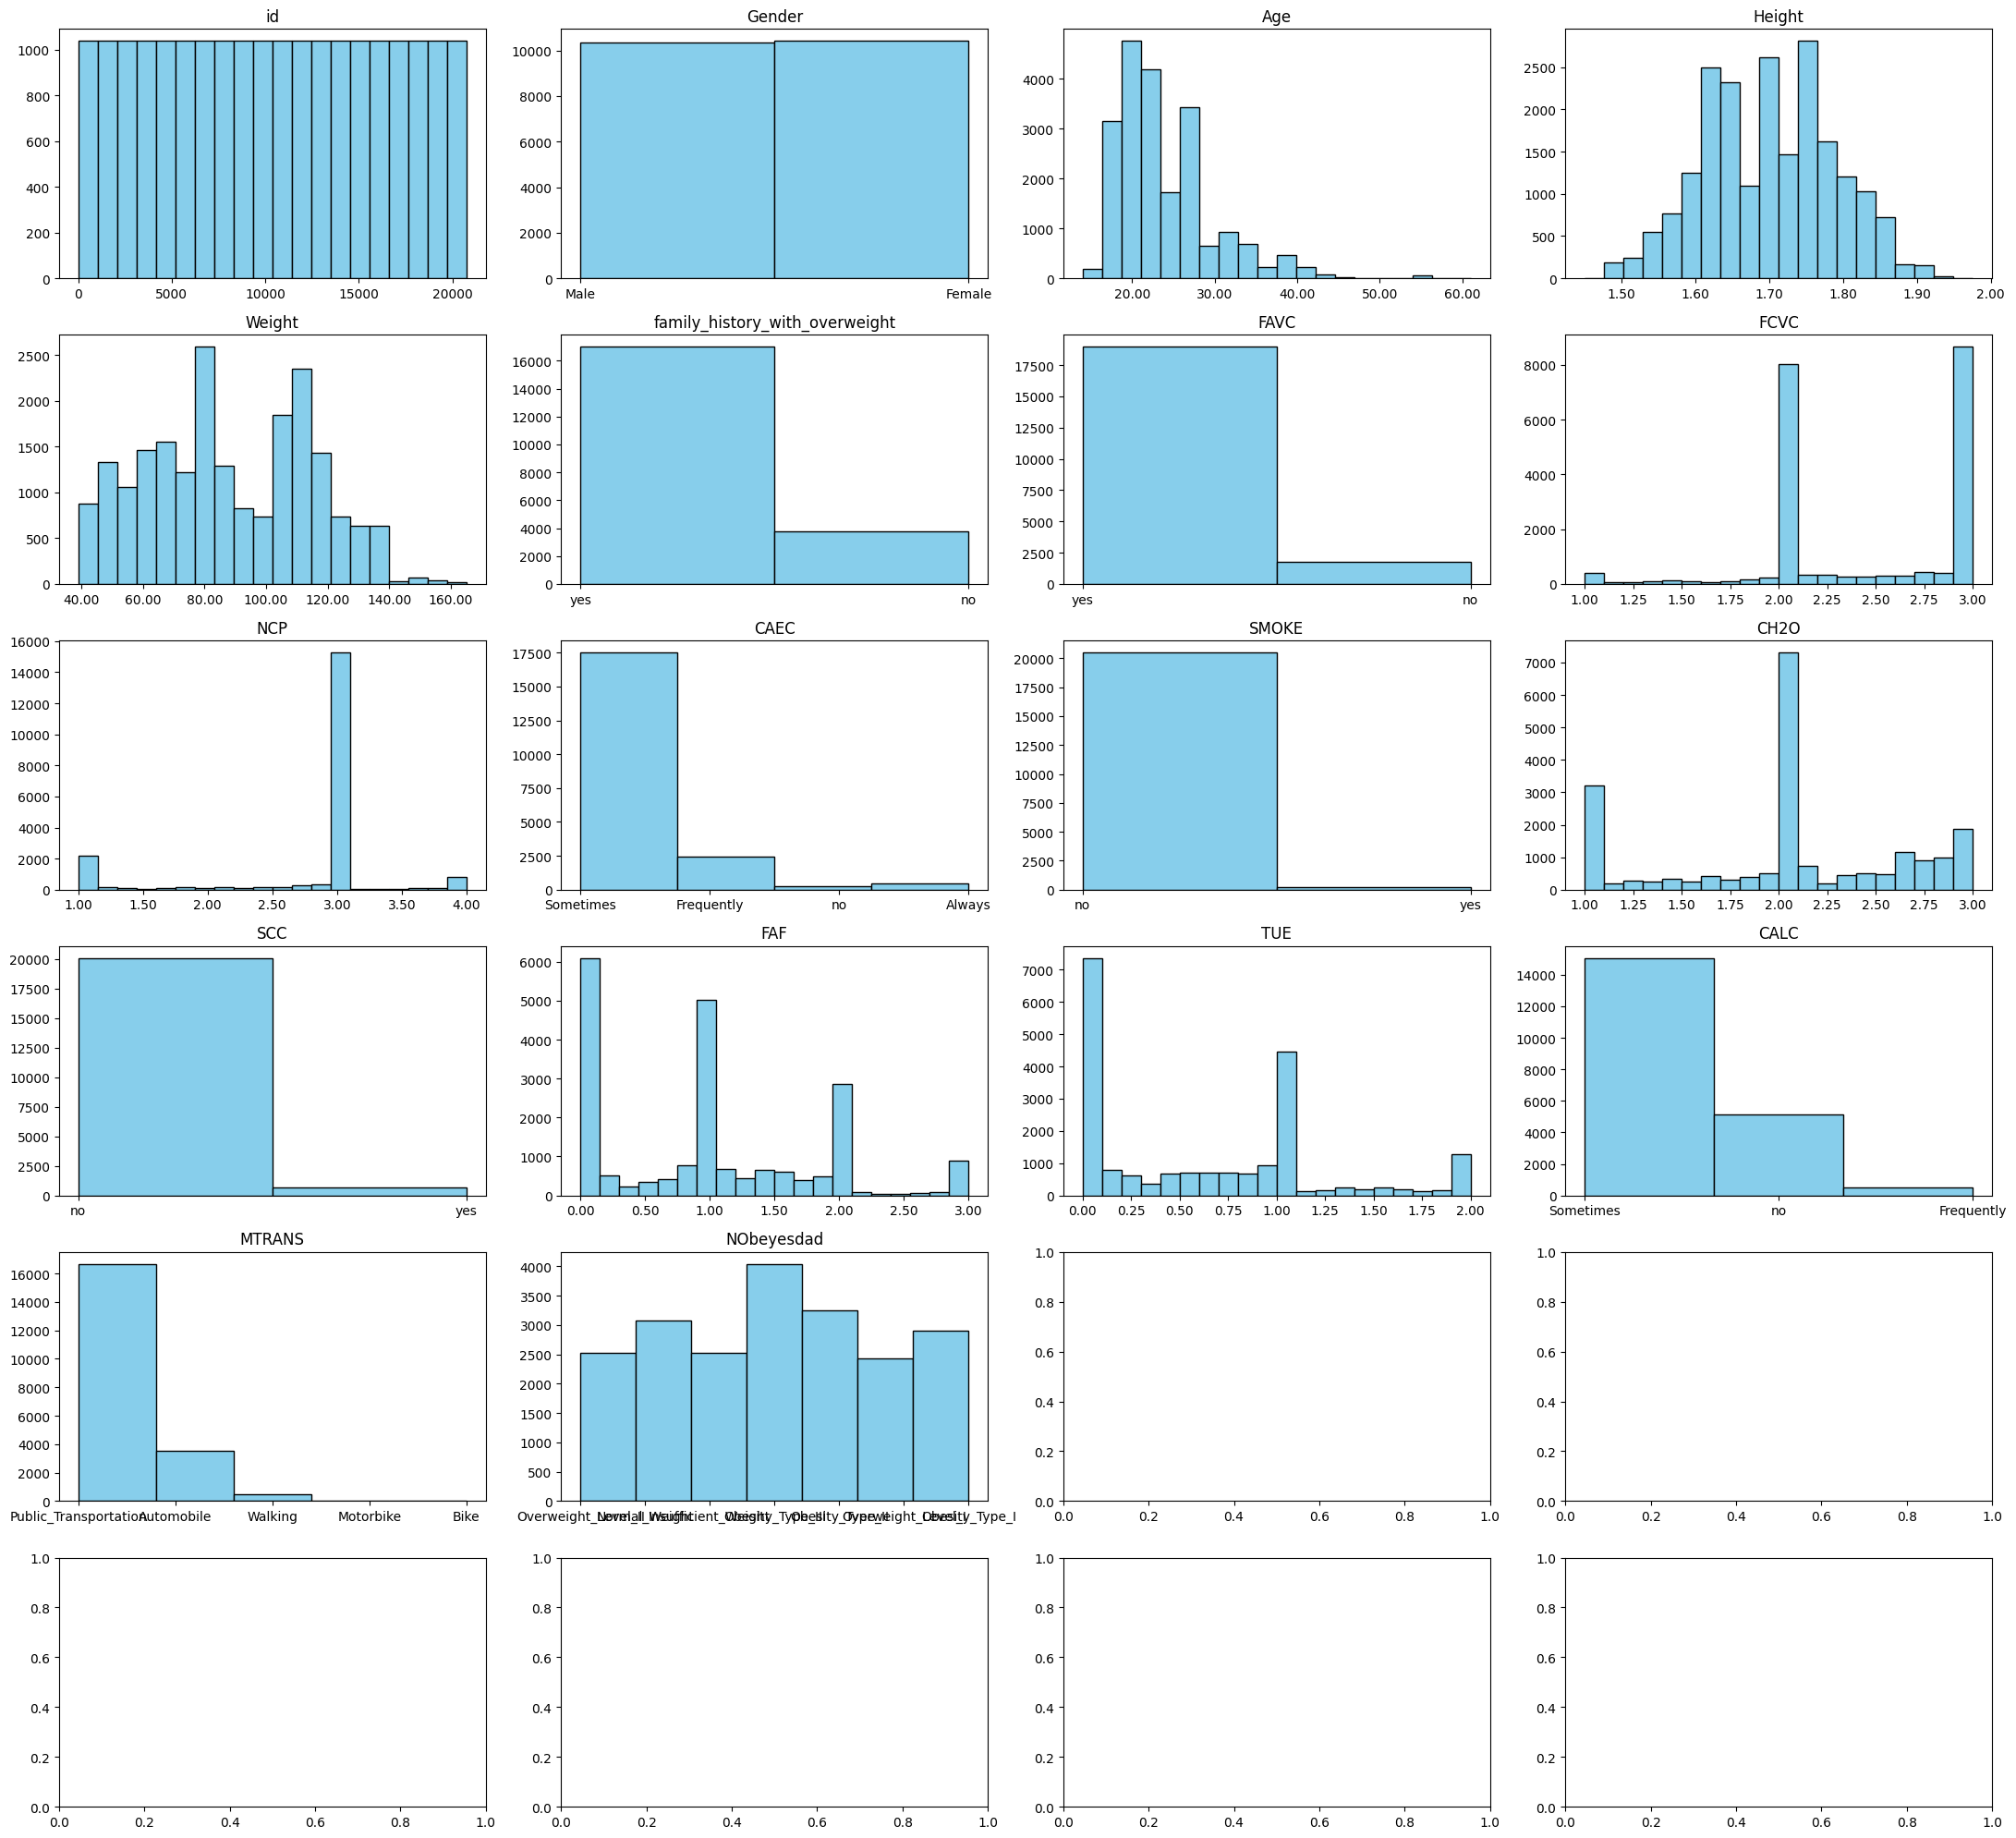

In [11]:
# Distribuição dos dados
import matplotlib.ticker as ticker
fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(22, 20))
axs_flatten = axs.flatten()
for index, (k, v) in enumerate(dados.items()):
    bins = min(len(set(v)), 20)
    axs_flatten[index].hist(v, bins=bins, color='skyblue', edgecolor='black')
    axs_flatten[index].set_title(k)

    if np.issubdtype(v.dtype, np.integer):
        axs_flatten[index].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
    elif np.issubdtype(v.dtype, np.floating):
        axs_flatten[index].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2f}'))

plt.tight_layout()
plt.show()

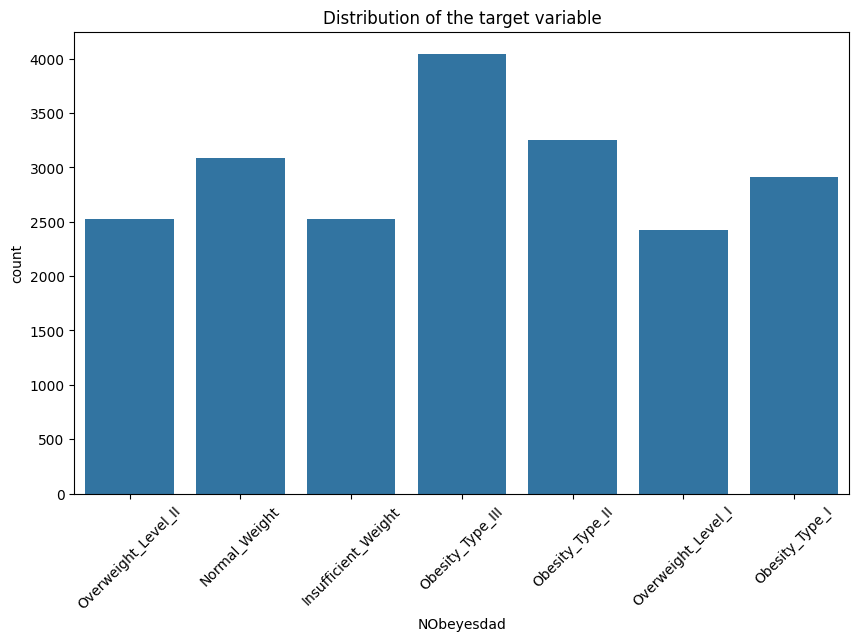

In [12]:
# Distribuição da variável target
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=dados)
plt.title('Distribution of the target variable')
plt.xticks(rotation=45)
plt.show()

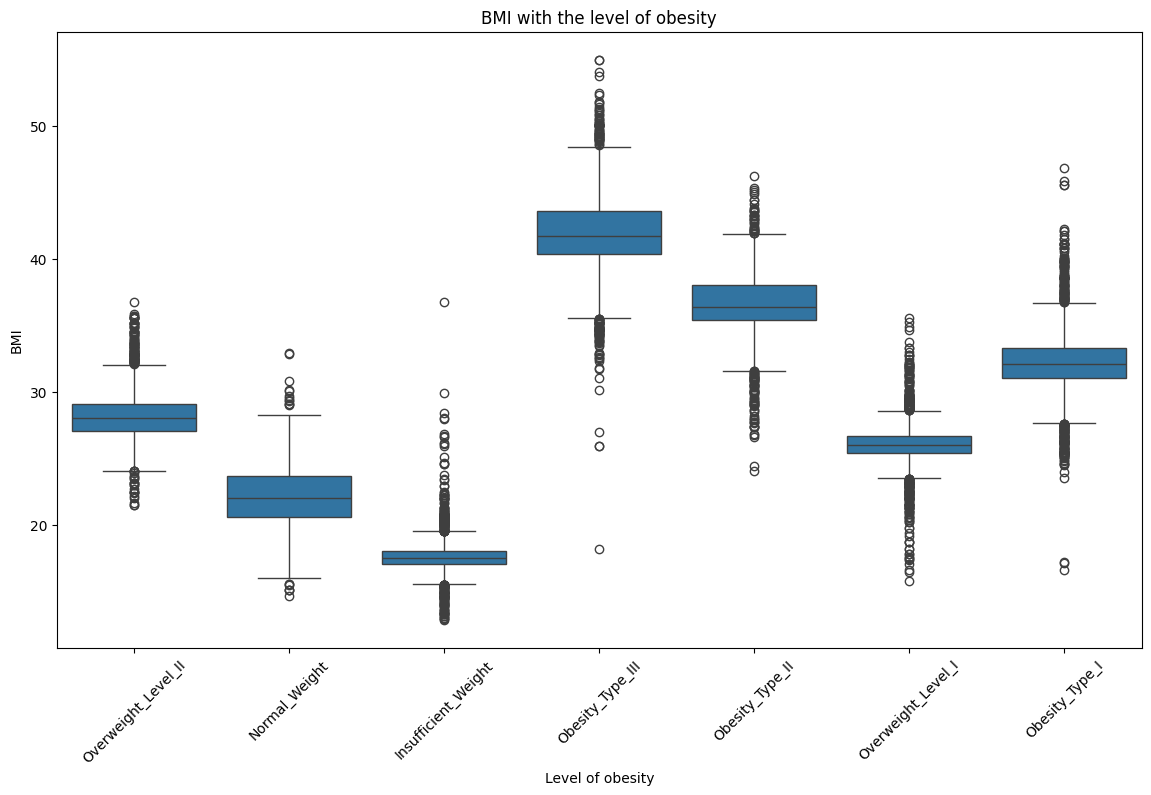

In [13]:
# Calculando o IMC e verificando em um boxplot a distribuição do IMC em relação
# aos níveis de obesidade

dados['BMI'] = dados['Weight'] / (dados['Height'] ** 2)

# Boxplot IMC
plt.figure(figsize=(14, 8))
sns.boxplot(x='NObeyesdad', y='BMI', data=dados)
plt.title('BMI with the level of obesity')
plt.xlabel('Level of obesity')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Carregando variaveis numéricas para plot
variaveis_numericas = []
for i in dados.columns[0:18].tolist():
        if dados.dtypes[i] == 'int64' or dados.dtypes[i] == 'float64':
            variaveis_numericas.append(i)

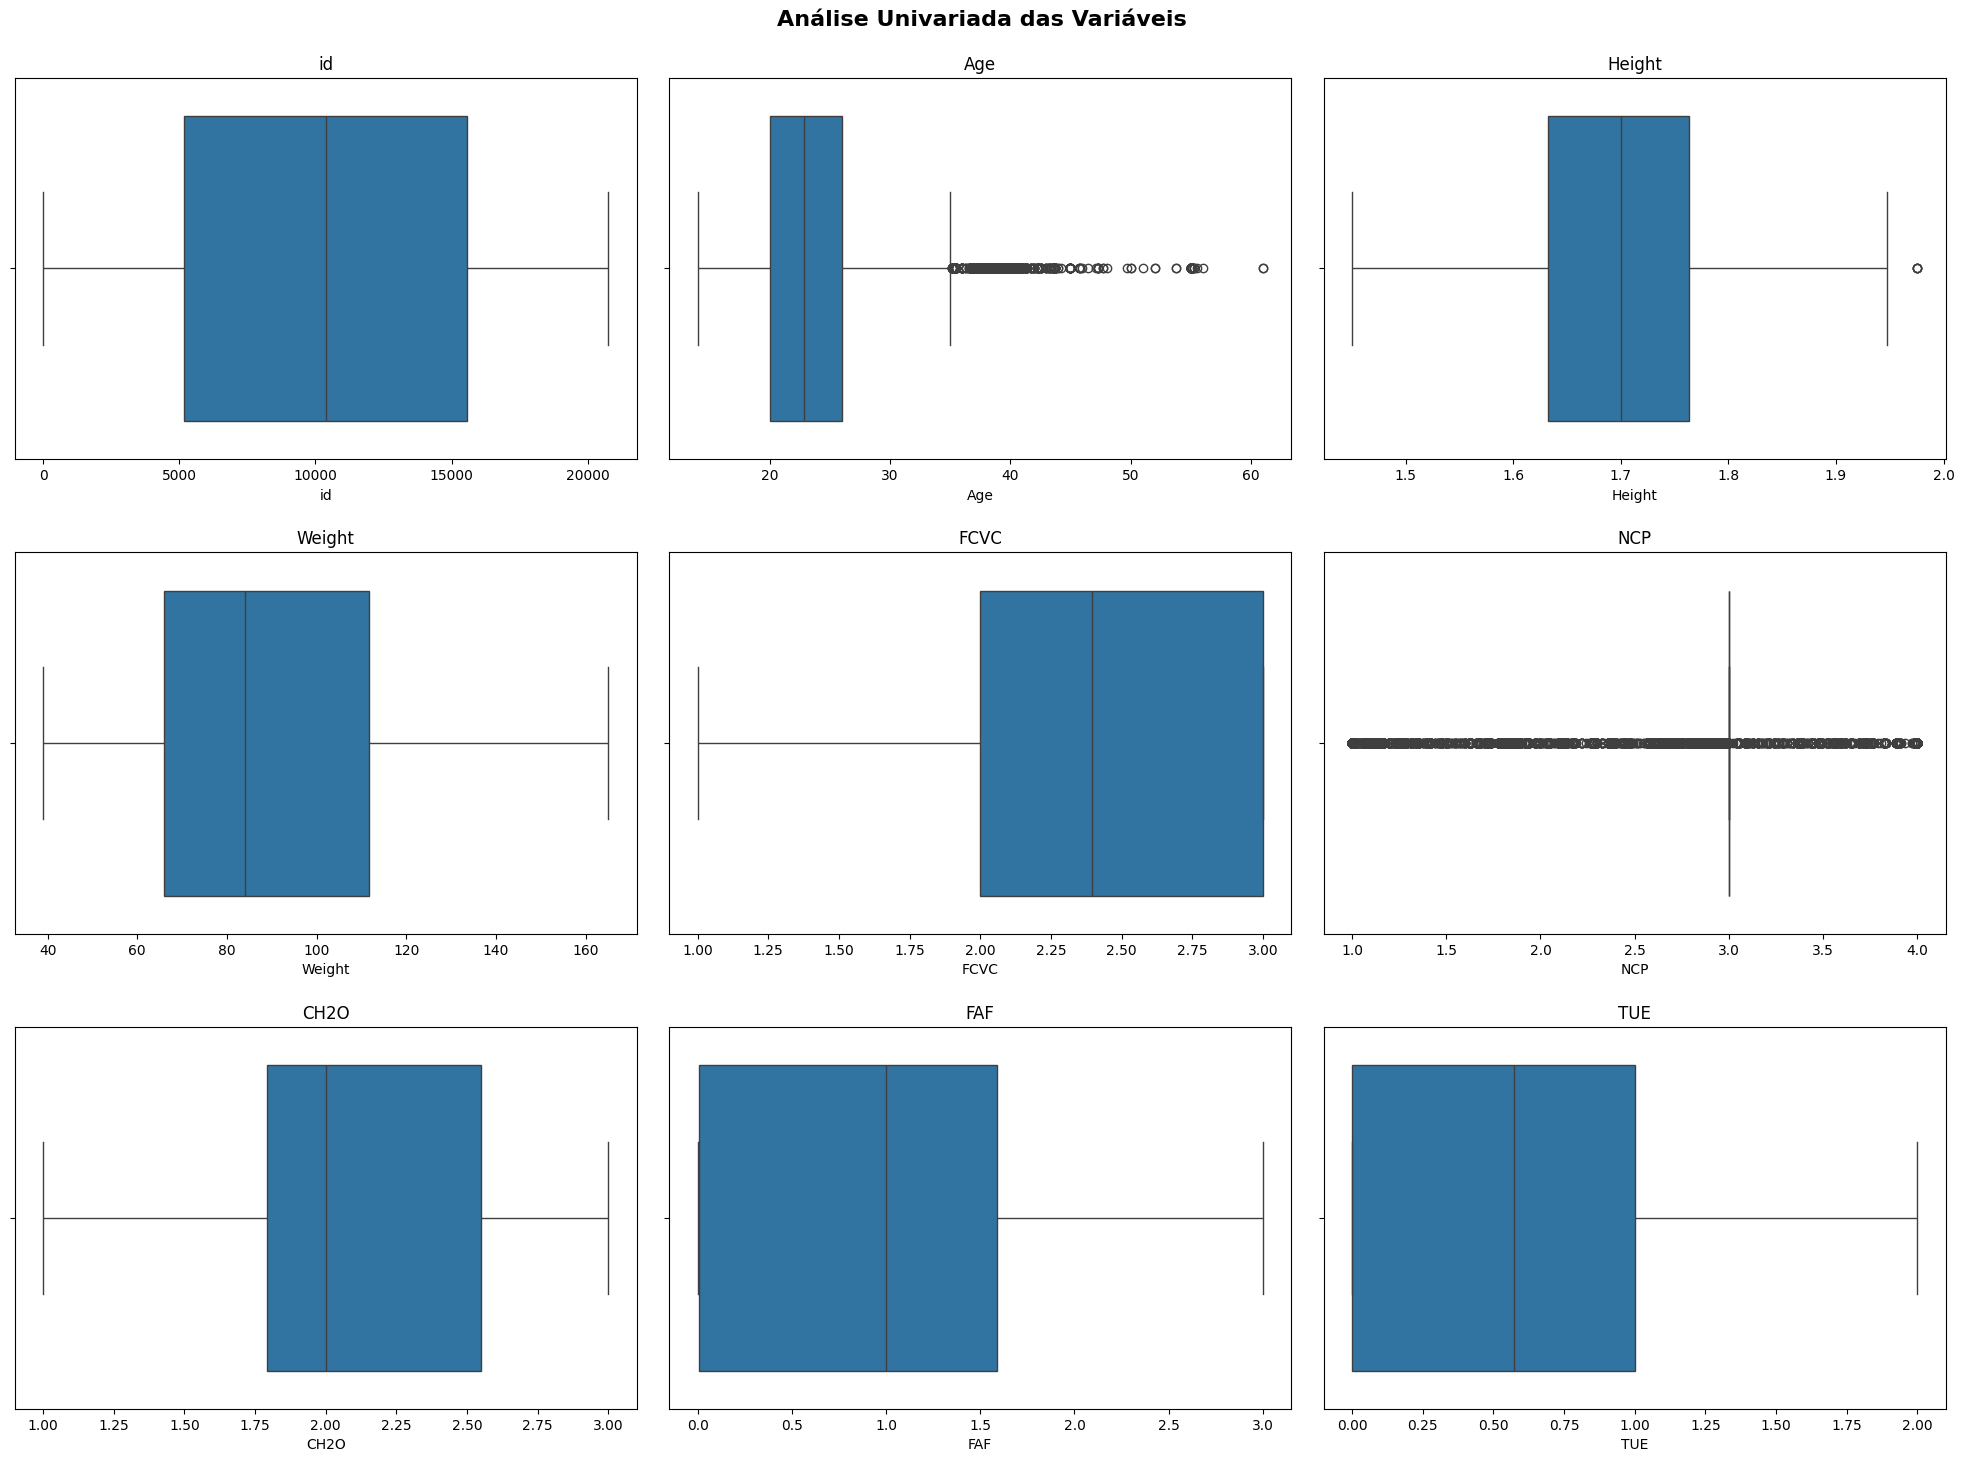

In [19]:
# Carregando boxplot para observar existência de outliers
plt.figure(figsize=(20, 15))
plt.suptitle("Análise Univariada das Variáveis", fontsize=16, fontweight='bold')

# Loop pelas variáveis numéricas e cria boxplots
for i in range(len(variaveis_numericas)):
    plt.subplot((len(variaveis_numericas) + 2) // 3, 3, i + 1)
    sns.boxplot(x=dados[variaveis_numericas[i]])
    plt.title(variaveis_numericas[i])
    plt.tight_layout(pad=2.0)

plt.show()

In [24]:
# Carregando variáveis categóricas
variaveis_categoricas = []
for i in dados.columns[0:18].tolist():
        if dados.dtypes[i] == 'object' or dados.dtypes[i] == 'category':
            variaveis_categoricas.append(i)

In [25]:
encoder = LabelEncoder()
for i in variaveis_categoricas:
  dados[i] = encoder.fit_transform(dados[[i]])

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Text(0.5, 1.0, 'Heatmap')

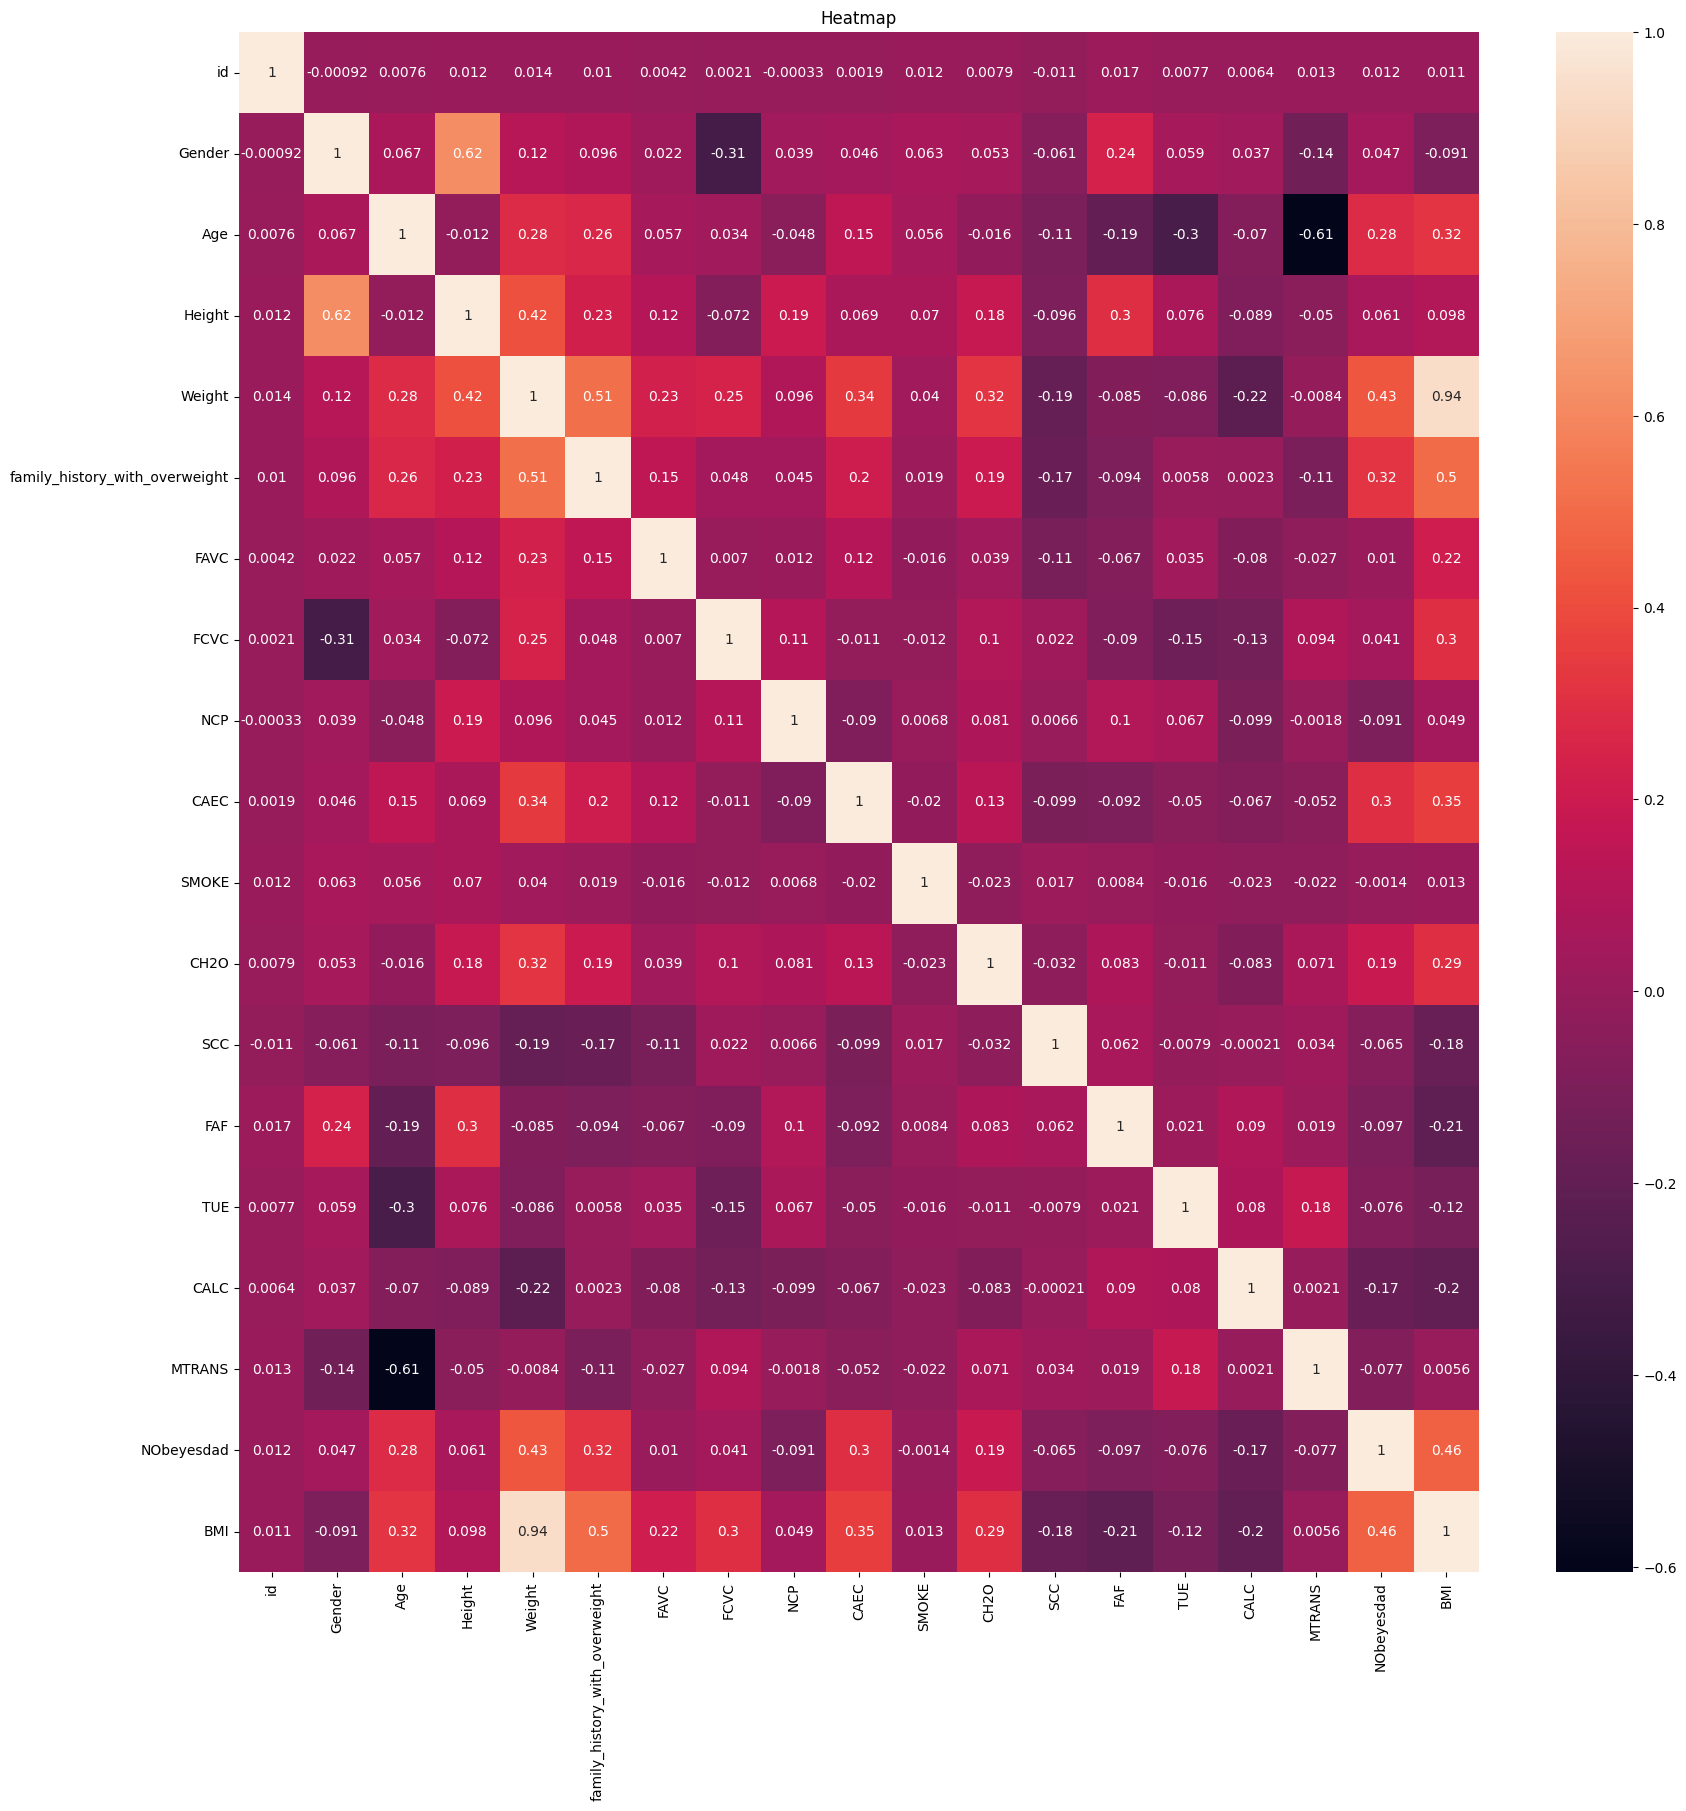

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(20,20))
fig.fontsize = 18
plt.subplots_adjust(hspace=0.2)
sns.heatmap(data = dados.corr(), annot=True, ax = axes)
axes.set_title("Heatmap")

In [28]:
# Dropando a variável que não serve
dados = dados.drop(['id'], axis=1)

In [29]:
# Criando a variável target
target = dados['NObeyesdad']

In [30]:
# Dropando a variável que não serve
preditoras = dados.drop(['NObeyesdad'], axis=1)

In [31]:
target.head()

0    6
1    1
2    0
3    4
4    6
Name: NObeyesdad, dtype: int64

In [32]:
preditoras.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,28.259565
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,23.422091
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,17.126706
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,44.855798
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,25.599151


In [33]:
target.shape

(20758,)

In [34]:
preditoras.shape

(20758, 17)

In [35]:
# Divisão em Dados de Treino e Teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.20)

In [36]:
# Padronização das Variáveis
padronizador = StandardScaler()
x_treino_padronizado = padronizador.fit_transform(x_treino)
x_teste_padronizado = padronizador.transform(x_teste)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
modelos = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)

}

params = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'SVM': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [38]:
modelos = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

params = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'SVM': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [39]:
from sklearn.model_selection import GridSearchCV
best_models = {}
best_accuracy = 0
best_model_name = ''
best_model = None

for model_name in modelos.keys():
    grid = GridSearchCV(modelos[model_name], params[model_name], cv=5, n_jobs=-1, verbose=1)
    grid.fit(x_treino_padronizado, y_treino)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    y_pred = grid.best_estimator_.predict(x_teste_padronizado)
    accuracy = accuracy_score(y_teste, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = grid.best_estimator_

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for RandomForest: {'max_depth': 20, 'n_estimators': 200}
Accuracy for RandomForest: 0.8988439306358381
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy for GradientBoosting: 0.9022157996146436
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy for SVM: 0.8723506743737958

Best model: GradientBoosting with accuracy: 0.9022157996146436


In [40]:
# Comparando
y_pred

array([2, 1, 4, ..., 2, 6, 1])

In [41]:
y_teste

6943     2
5334     6
6280     4
24       0
7069     2
        ..
3539     2
12088    5
3989     2
17422    3
11763    5
Name: NObeyesdad, Length: 4152, dtype: int64

In [42]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       516
           1       0.83      0.83      0.83       602
           2       0.88      0.86      0.87       621
           3       0.95      0.96      0.96       626
           4       1.00      0.99      1.00       803
           5       0.72      0.69      0.71       487
           6       0.72      0.78      0.75       497

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152



In [43]:
cm = confusion_matrix(y_teste, y_pred)
print(cm)

[[466  47   0   0   0   3   0]
 [ 44 497   3   0   0  54   4]
 [  1   1 532  24   2  14  47]
 [  0   1  16 602   0   1   6]
 [  0   0   2   2 798   1   0]
 [  2  45  12   0   0 337  91]
 [  0   7  41   4   0  55 390]]


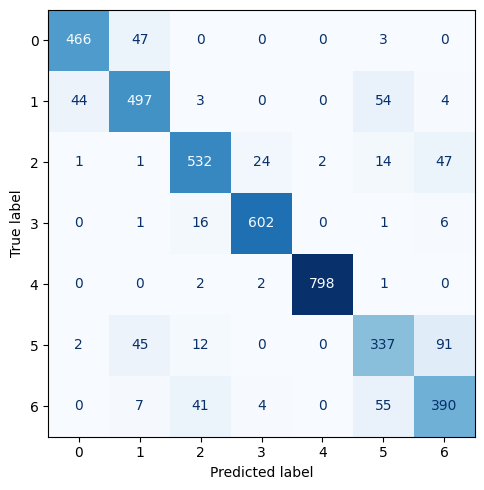

In [44]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True
cm_disp.plot(include_values=True,
             cmap='Blues',
             colorbar=None)